# Proyek Analisis Data: Bike Sharing Dataset
- Kelompok : IF12K - 10123904
- Anggota : </br>
10123902 - Adrian Satria Putra</br>
10123903 - Taufan Ikhsan Firdaus</br>
10123904 - Enjang Suherlan</br>
10123911 - Ridwan Faizal

## Menentukan Pertanyaan Bisnis

1. Bagaimana kecepatan angin (windspeed) memengaruhi peminjaman sepeda? - 10123911 - Ridwan faizal
2. Apakah waktu dan kondisi cuaca dapat mempengaruhi jumlah penyewaan? - 10123902 - Adrian Satria Putra
3. Bagaimana statistik total penyewaan sepeda berbeda antara hari libur dan hari kerja? - 10123904 - Enjang Suherlan
4. Musim apa yang memiliki potensi terbesar untuk promosi layanan sepeda, dan mengapa? 10123903 - Taufan Ikhsan Firdaus





## Menyiapkan semua library yang dibutuhkan

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.cluster import KMeans

## Data Wrangling
Tahapan ini merupakan tahapan untuk mempersiapkan data mentah menjadi bentuk yang lebih bersih, terstruktur, dan siap digunakan untuk proses analisis data. pada tahapan ini terdiri dari


1.   Gathering Data
2.   Assessing Data
3. Cleaning Data



### Gathering Data (Pengumpulan Data)
ini merupakan tahapan dalam pengumpulan data dari berbagai sumber, disini merupakan tahapan import dataset kedalam notebook

In [29]:
# !gdown --id 1px2b94EY0O7cxk7oBbBrOKb5kRM2VDbQ -O day.csv

!wget --no-check-certificate -O day.csv "https://raw.githubusercontent.com/adriansatria/uas_ipynb/main/datasets/day.csv"

--2025-02-14 07:25:30--  https://raw.githubusercontent.com/adriansatria/uas_ipynb/main/datasets/day.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57569 (56K) [text/plain]
Saving to: ‘day.csv’

day.csv             100%[===================>]  56.22K  --.-KB/s    in 0.009s  

2025-02-14 07:25:30 (6.16 MB/s) - ‘day.csv’ saved [57569/57569]



In [30]:
# !gdown --id 1FGTTLhhU7g6XCnTiu4sSciBJnMTztXrc -O hour.csv
!wget --no-check-certificate -O hour.csv "https://raw.githubusercontent.com/adriansatria/uas_ipynb/main/datasets/hour.csv"

--2025-02-14 07:25:30--  https://raw.githubusercontent.com/adriansatria/uas_ipynb/main/datasets/hour.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1156736 (1.1M) [text/plain]
Saving to: ‘hour.csv’

hour.csv            100%[===================>]   1.10M  --.-KB/s    in 0.04s   

2025-02-14 07:25:30 (30.1 MB/s) - ‘hour.csv’ saved [1156736/1156736]



In [31]:
# VARIABLE DATA PERHARI
read_perday = pd.read_csv('day.csv')

read_perday.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [32]:
# VARIABLE DATA PERJAM
read_perhour = pd.read_csv('hour.csv')

read_perhour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Dari output data diatas, keduanya memiliki field hampir keseluruhan itu sama yang membedakan hanya field / kolom hr pada dataset hour.csv. Berikut merupakan penjelasan dari tiap kolomnya :

* **dteday**: Tanggal data diambil.
* **season**: Musim dalam bentuk angka (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin).
* **yr**: Value 0 untuk tahun 2011 dan value 1 untuk tahun 2012.
* **mnth**: Bulan dari 1 hingga 12.
* **hr**: Jam dalam format 24 jam.
* **holiday**: 1 jika hari tersebut libur, 0 jika bukan libur.
* **weekday**: Hari dalam minggu, di mana 0 = Minggu, 1 = Senin, dan seterusnya.
* **workingday**: 1 jika hari kerja (bukan libur), 0 jika tidak.
* **weathersit**: Kondisi cuaca dalam kode numerik (1 = cerah, 2 = berkabut, 3 = hujan ringan, 4 = hujan lebat).
* **temp**: Suhu aktual dalam skala 0 hingga 1.
* **atemp**: Suhu yang dirasakan.
* **hum**: Kelembapan dalam skala 0 hingga 1.
* **windspeed**: Kecepatan angin dalam skala 0 hingga 1.
* **casual**: Jumlah pengguna casual (tanpa registrasi).
* **registered**: Jumlah pengguna terdaftar.
* **cnt**: Jumlah total penyewaan sepeda.


### Assessing Data (Penilaian Data)
ini merupakan tahapan untuk melakukan evaluasi data untuk mengidentifikasi masalah kualitas dan struktur data yang dapat mempengaruhi analisis dari mulai missing value, pencilan, ataupun tipe data yang tidak sesuai

Cek apakah ada data duplikat di setiap harinya

In [33]:
# Check data duplikat
read_perday.duplicated().sum()

0

Cek tipe data dari setiap kolom pada data frame

In [34]:
# Check tipe data dari dataframe
read_perday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [35]:
# Check tipe data dari dataframe
read_perhour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Untuk tanggal pada dataframe masih memiliki tipe data Object yang dimana seharusnya bertipe Datetime. Maka untuk mengubahnya adalah sebagai berikut :

In [36]:
# Ubah tipe data
read_perday['dteday'] = pd.to_datetime(read_perday['dteday'])

read_perday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [37]:
# Ubah tipe data
read_perhour['dteday'] = pd.to_datetime(read_perhour['dteday'])

read_perhour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### Cleaning Data (Pembersihan Data)
ini merupakan tahapan penghapusan atau koreksi data yang bermasalah untuk memastikan data siap dianalisa

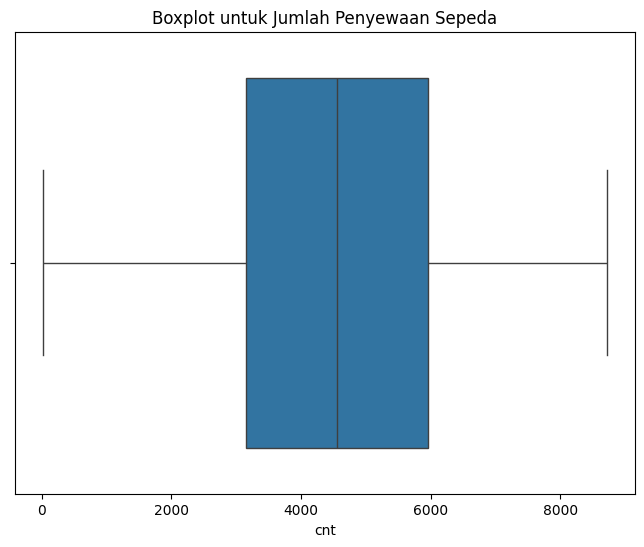

In [38]:
# Membuat boxplot untuk kolom 'cnt'
plt.figure(figsize=(8, 6))
sns.boxplot(x=read_perday['cnt'])
plt.title('Boxplot untuk Jumlah Penyewaan Sepeda')
plt.show()

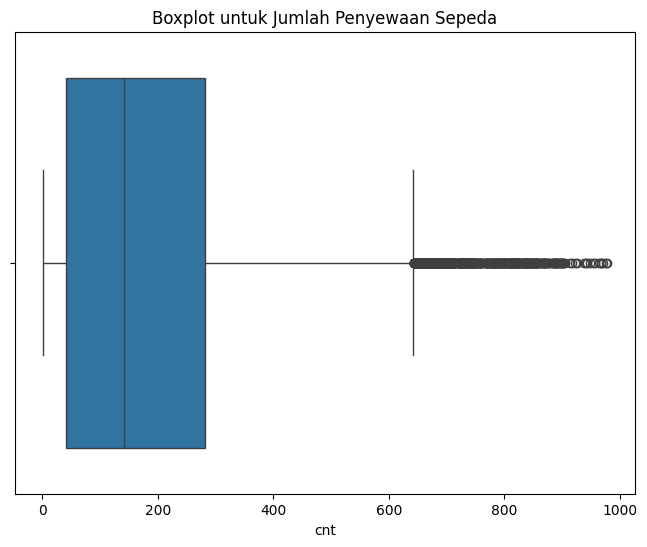

In [39]:
# Membuat boxplot untuk kolom 'cnt'
plt.figure(figsize=(8, 6))
sns.boxplot(x=read_perhour['cnt'])
plt.title('Boxplot untuk Jumlah Penyewaan Sepeda')
plt.show()

In [40]:
# Menghitung Z-Score untuk kolom 'cnt'
z_scores = np.abs(stats.zscore(read_perhour['cnt']))

z_scores

# Menentukan threshold (contoh: Z-Score > 3 dianggap outlier)
threshold = 3
outliers = np.where(z_scores > threshold)

# Menampilkan baris yang merupakan outlier
read_perhour.iloc[outliers]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
10383,10384,2012-03-13,1,1,3,18,0,2,1,1,0.70,0.6364,0.34,0.2985,96,638,734
10406,10407,2012-03-14,1,1,3,17,0,3,1,1,0.70,0.6364,0.28,0.0896,140,642,782
10407,10408,2012-03-14,1,1,3,18,0,3,1,1,0.70,0.6364,0.32,0.0000,102,647,749
10431,10432,2012-03-15,1,1,3,18,0,4,1,1,0.66,0.6212,0.44,0.2836,98,648,746
10527,10528,2012-03-19,1,1,3,18,0,1,1,1,0.64,0.6212,0.57,0.2537,120,681,801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15828,15829,2012-10-26,4,1,10,17,0,5,1,2,0.56,0.5303,0.76,0.1940,125,692,817
15848,15849,2012-10-27,4,1,10,13,0,6,0,1,0.60,0.6212,0.43,0.2537,310,450,760
15849,15850,2012-10-27,4,1,10,14,0,6,0,1,0.60,0.6212,0.46,0.2537,325,425,750
16726,16727,2012-12-04,4,1,12,17,0,2,1,1,0.52,0.5000,0.59,0.2239,43,700,743


In [41]:
# Mendapatkan index baris yang bukan outlier
non_outliers = np.where(z_scores <= threshold)


# Membuat DataFrame baru tanpa outlier
df_cleaned = read_perhour.iloc[non_outliers]
df_cleaned

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Exploratory Data Analysis (EDA)

### Explore ...

In [42]:
df_cleaned.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17135.00000,17135,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000,17135.000000
mean,8616.41033,2011-12-30 02:24:27.732710656,2.494718,0.495477,6.522264,11.485848,0.029180,3.003793,0.678669,1.428246,0.494417,0.473547,0.628875,0.189893,34.818267,145.672250,180.490516
min,1.00000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4284.50000,2011-07-02 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,33.000000,39.000000
50%,8568.00000,2011-12-28 00:00:00,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,16.000000,113.000000,139.000000
75%,12916.50000,2012-06-27 00:00:00,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,47.000000,214.000000,273.000000
max,17379.00000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,712.000000,733.000000
std,5011.06776,NaN,1.109381,0.499994,3.451943,6.931725,0.168316,2.013274,0.467001,0.640886,0.192284,0.171711,0.192907,0.122455,48.728987,135.894681,166.101082


In [43]:
data_frame_ratio = read_perday

day_mapping = {
    0: 'Senin',
    1: 'Selasa',
    2: 'Rabu',
    3: 'Kamis',
    4: 'Jumat',
    5: 'Sabtu',
    6: 'Minggu'
}

daily_data = data_frame_ratio.groupby('dteday').sum().reset_index()

# Ubah format hari menjadi string
daily_data['weekday'] = daily_data['weekday'].map(day_mapping)

daily_data['casual_ratio'] = daily_data['casual'] / daily_data['cnt']
daily_data['registered_ratio'] = daily_data['registered'] / daily_data['cnt']

# Urutan hari dalam seminggu
order = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

# Total user tiap hari
total_eachday = daily_data.groupby('weekday')[['casual', 'registered']].sum().sort_values(
    by='weekday',
    key=lambda x: x.map({day: i for i, day in enumerate(order)})
    ).reset_index()

display(total_eachday)

,weekday,casual,registered
0,Senin,140521,303506
1,Selasa,70784,384719
2,Rabu,57843,411266
3,Kamis,57319,415729
4,Jumat,61460,423935
5,Sabtu,78238,409552
6,Minggu,153852,323955


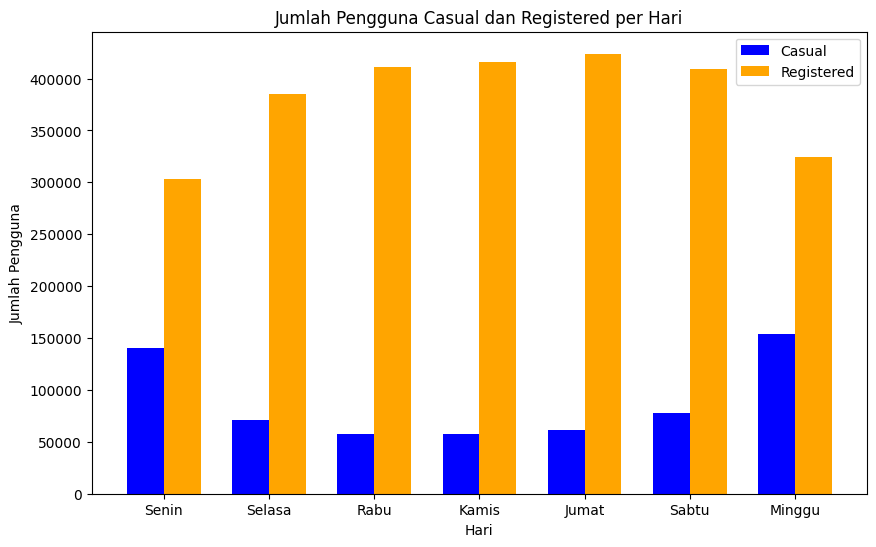

In [44]:
# Visualisasi dengan line plot
plt.figure(figsize=(10,6))

# Membuat grafik batang berkelompok
x = np.arange(len(order))  # Lokasi weekday pada sumbu x
width = 0.35  # Lebar batang

plt.bar(x - width/2, total_eachday['casual'], width, label='Casual', color='blue')
plt.bar(x + width/2, total_eachday['registered'], width, label='Registered', color='orange')

# Menambahkan label, judul, dan legenda
plt.title("Jumlah Pengguna Casual dan Registered per Hari")
plt.xlabel("Hari")
plt.ylabel("Jumlah Pengguna")
plt.xticks(x, total_eachday['weekday'])  # Mengatur label sumbu x sesuai nama hari
plt.legend()

# Menampilkan grafik
plt.show()

Dari statistik diatas, diketahui bahwa jumlah penyewa perharinya di setiap tahun didominasi oleh user terdaftar (registered).

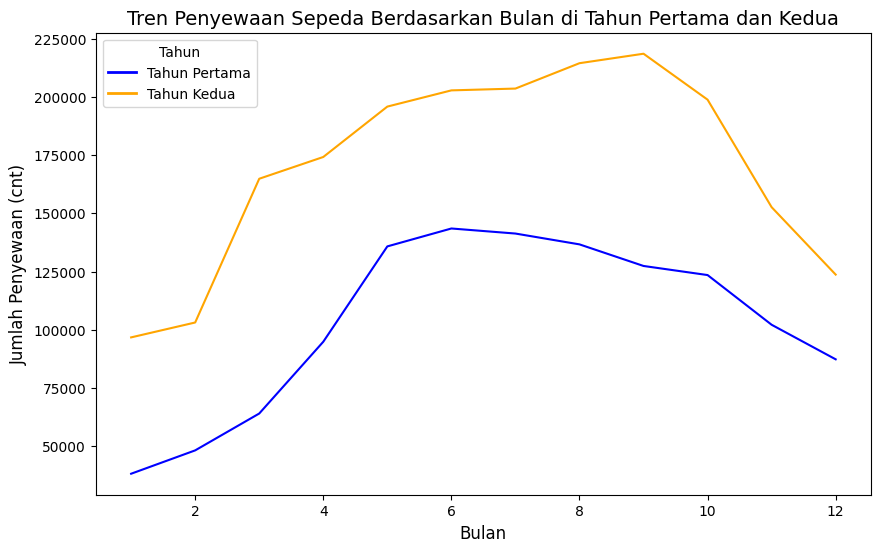

In [45]:
# Membuat data agregat untuk tren penyewaan per bulan di setiap tahun
monthly_trend = data_frame_ratio.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

# Visualisasi dengan line plot
plt.figure(figsize=(10,6))

# Buat plot dan simpan objek garis
sns.lineplot(data=monthly_trend, x='mnth', y='cnt', hue='yr', palette=['blue', 'orange'])

# Tambahkan judul dan label
plt.title('Tren Penyewaan Sepeda Berdasarkan Bulan di Tahun Pertama dan Kedua', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Penyewaan (cnt)', fontsize=12)

# Sesuaikan legend dengan warna sesuai
legend_labels = ['Tahun Pertama', 'Tahun Kedua']
legend_colors = ['blue', 'orange']
plt.legend(handles=[plt.Line2D([0], [0], color=color, lw=2) for color in legend_colors],
           labels=legend_labels, title="Tahun", loc='best')

# Tampilkan plot
plt.show()

1. **Tren Umum**: Terlihat peningkatan jumlah penyewaan sepeda dari tahun pertama ke tahun kedua, menunjukkan pertumbuhan popularitas layanan sepeda.
2. **Bulan Puncak**: Pada kedua tahun, penyewaan sepeda mencapai puncaknya di bulan-bulan pertengahan tahun (sekitar bulan 6 hingga 8), yang kemungkinan besar terkait dengan cuaca yang lebih hangat dan kondisi yang lebih nyaman untuk bersepeda.
3. **Bulan Rendah**: Penyewaan sepeda cenderung lebih rendah di bulan-bulan awal dan akhir tahun (sekitar bulan 1 hingga 3 dan 10 hingga 12), yang mungkin dipengaruhi oleh cuaca yang lebih dingin dan kurang mendukung.
<br>
**Kesimpulan:**  
Tren penyewaan sepeda menunjukkan pola musiman yang jelas dengan peningkatan selama bulan-bulan musim panas dan penurunan selama bulan-bulan musim dingin. Pertumbuhan dari tahun pertama ke tahun kedua menunjukkan peningkatan minat dan penggunaan layanan sepeda, yang dapat dimanfaatkan untuk perencanaan dan promosi lebih lanjut.

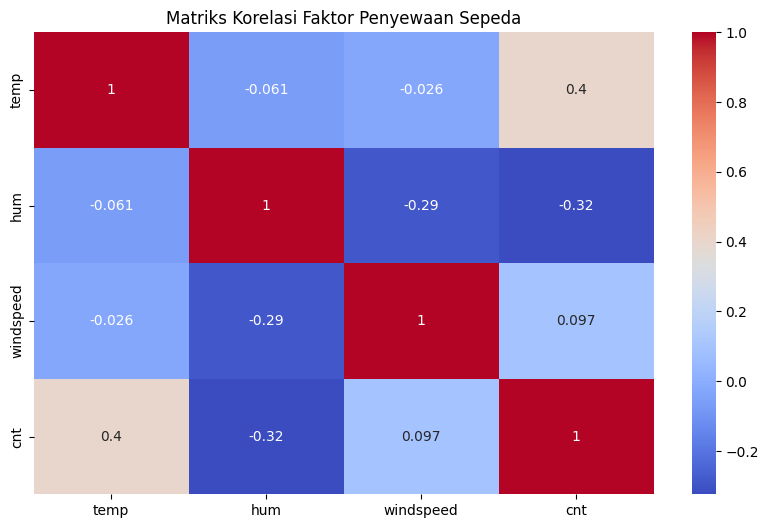

In [46]:
correlation_data = df_cleaned[['temp', 'hum', 'windspeed', 'cnt']]
correlation_matrix = correlation_data.corr()

# Visualisasi matriks korelasi
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.title("Matriks Korelasi Faktor Penyewaan Sepeda")
plt.show()

  Matriks korelasi menunjukkan hubungan antara suhu, kelembaban, kecepatan angin, dan jumlah penyewaan sepeda:<br>
    1. **Suhu (temp)**: Korelasi positif dengan jumlah penyewaan, menunjukkan bahwa suhu yang lebih hangat meningkatkan minat penyewaan.<br>
    2. **Kelembaban (hum)**: Korelasi negatif, menunjukkan bahwa kelembaban tinggi mengurangi minat penyewaan.<br>
    3. **Kecepatan Angin (windspeed)**: Korelasi negatif, menunjukkan bahwa angin kencang mengurangi minat penyewaan.<br>

Kesimpulan:
Faktor cuaca seperti suhu, kelembaban, dan kecepatan angin memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda.

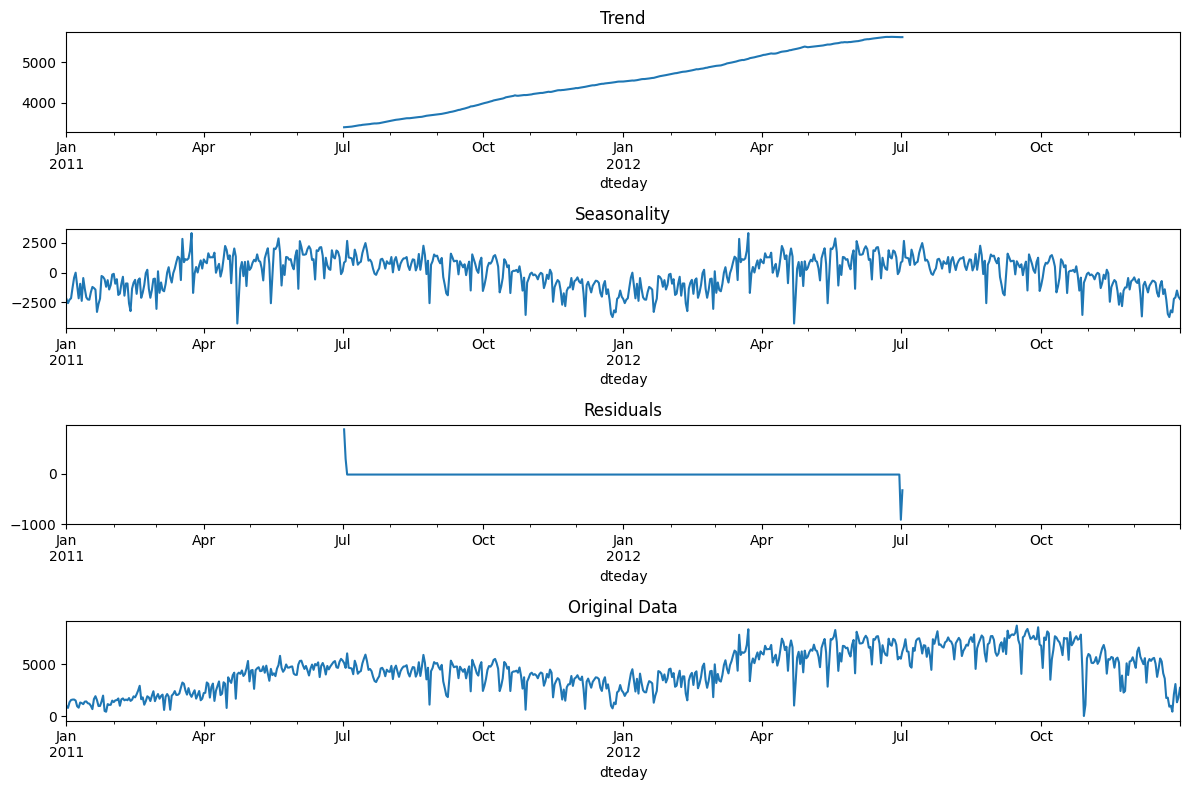

In [47]:
time_series_data = read_perday.set_index('dteday')['cnt']
decomposition = seasonal_decompose(time_series_data, model='additive', period=365)

# Visualisasi time series
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.trend.plot(ax=ax1)
ax1.set_title('Trend')
decomposition.seasonal.plot(ax=ax2)
ax2.set_title('Seasonality')
decomposition.resid.plot(ax=ax3)
ax3.set_title('Residuals')
time_series_data.plot(ax=ax4)
ax4.set_title('Original Data')
plt.tight_layout()

plt.show()

Analisis time series menunjukkan:<br>
    1. **Trend**: Ada peningkatan tren penyewaan sepeda dari waktu ke waktu.<br>
    2. **Seasonality**: Terlihat pola musiman dengan peningkatan penyewaan pada bulan-bulan tertentu.<br>
    3. **Residuals**: Variasi acak yang tidak dapat dijelaskan oleh tren atau musiman.

Kesimpulan:
Tren yang meningkat menunjukkan pertumbuhan popularitas layanan sepeda, sementara pola musiman dapat digunakan untuk merencanakan promosi atau penyesuaian layanan.

<ipython-input-48-8e57f9467a40>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['cluster'] = kmeans.fit_predict(cluster_data)


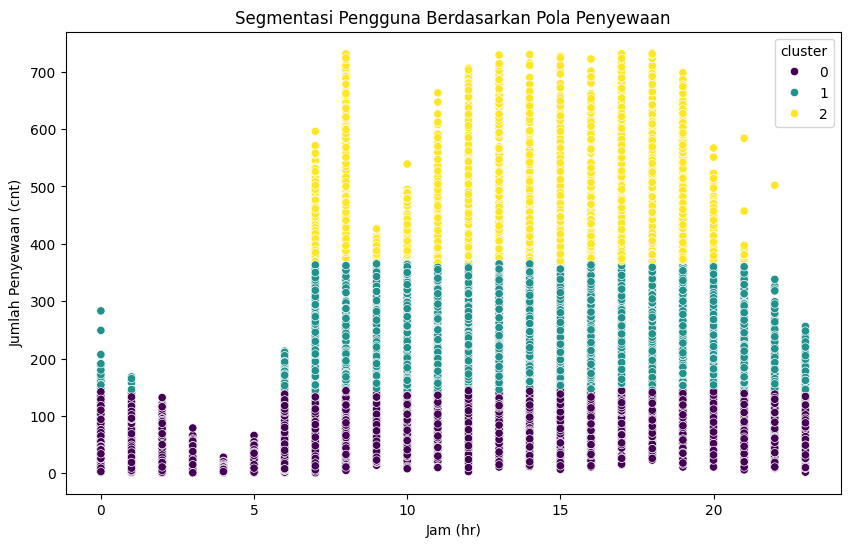

In [48]:
cluster_data = df_cleaned[['hr', 'weathersit', 'cnt']]
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['cluster'] = kmeans.fit_predict(cluster_data)

# Visualisasi clustering
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='hr', y='cnt', hue='cluster', data=df_cleaned, palette='viridis', ax=ax)
plt.title("Segmentasi Pengguna Berdasarkan Pola Penyewaan")
plt.xlabel("Jam (hr)")
plt.ylabel("Jumlah Penyewaan (cnt)")

plt.show()

Dengan menggunakan teknik clustering K-Means, kami mengidentifikasi tiga kelompok pengguna berdasarkan pola penyewaan sepeda:
1. **Cluster 0**: Pengguna dengan penyewaan rendah, biasanya pada malam hari atau saat cuaca buruk.
2. **Cluster 1**: Pengguna dengan penyewaan sedang, biasanya pada pagi atau sore hari.
3. **Cluster 2**: Pengguna dengan penyewaan tinggi, biasanya pada siang hari atau saat cuaca cerah.

**Kesimpulan:**  
Segmentasi ini membantu dalam memahami pola penggunaan sepeda dan dapat digunakan untuk menargetkan promosi atau layanan yang lebih spesifik.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

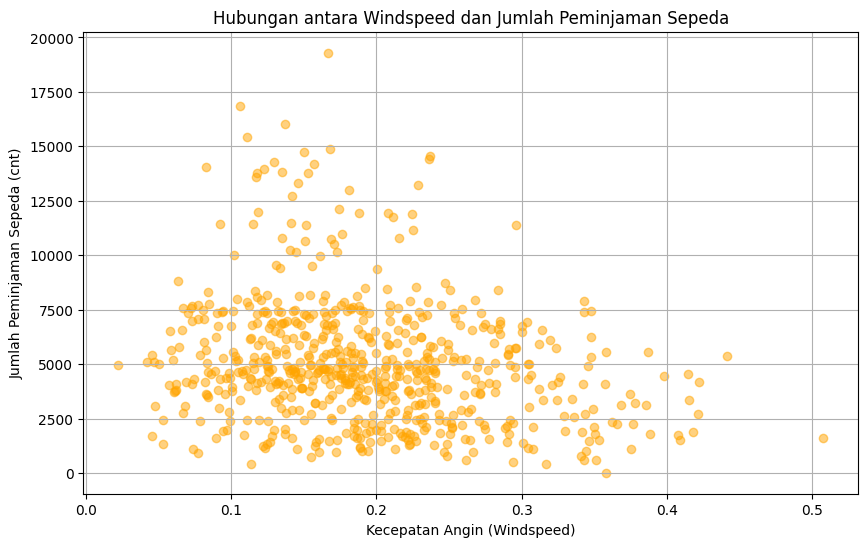

,windspeed,cnt
windspeed,1.000000,-0.229546
cnt,-0.229546,1.000000


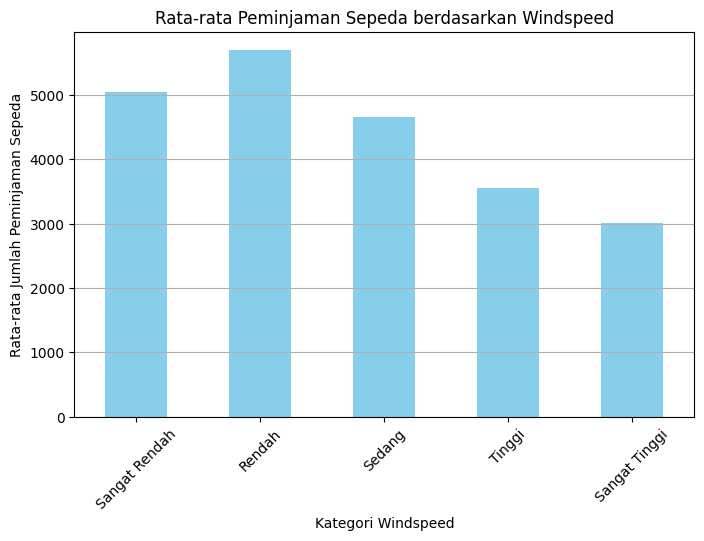

In [49]:
collectByWindSpeed = read_perday.groupby('windspeed')['cnt'].sum().reset_index()

# Scatter Plot: Hubungan antara Windspeed dan Jumlah Peminjaman
plt.figure(figsize=(10, 6))
plt.scatter(collectByWindSpeed['windspeed'], collectByWindSpeed['cnt'], alpha=0.5, color='orange')
plt.title('Hubungan antara Windspeed dan Jumlah Peminjaman Sepeda')
plt.xlabel('Kecepatan Angin (Windspeed)')
plt.ylabel('Jumlah Peminjaman Sepeda (cnt)')
plt.grid()
plt.show()

# Korelasi antara Windspeed dan Jumlah Peminjaman
correlation = collectByWindSpeed[['windspeed', 'cnt']].corr()
display(correlation)

# Mengelompokkan Windspeed menjadi Kategori
collectByWindSpeed['windspeed_range'] = pd.cut(
    collectByWindSpeed['windspeed'],
    bins=[0, 0.1, 0.2, 0.3, 0.4, 1.0],
    labels=['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']
)

# Rata-rata jumlah peminjaman berdasarkan kategori Windspeed (explicit observed=False)
grouped = collectByWindSpeed.groupby('windspeed_range', observed=False)['cnt'].mean()

# Bar Plot: Rata-rata Peminjaman Berdasarkan Kategori Windspeed
grouped.plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title('Rata-rata Peminjaman Sepeda berdasarkan Windspeed')
plt.xlabel('Kategori Windspeed')
plt.ylabel('Rata-rata Jumlah Peminjaman Sepeda')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### Pertanyaan 2:

In [50]:
# Membuat kolom baru 'rentang_waktu' berdasarkan jam
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 18:
        return 'Siang'
    elif 18 <= hour < 20:
        return 'Sore'
    else:
        return 'Malam'


def weather_of_day(weathersit):
    if weathersit == 1:
        return 'Cerah/Sedikit berawan'
    elif weathersit == 2:
        return 'Berawan/Berkabut'
    elif weathersit == 3:
        return 'Hujan Salju/Badai'
    elif weathersit == 4:
        return 'Cuaca Ekstrim'
    else:
        return 'Tidak Valid'

dataQuestion2 = df_cleaned

# Asign jam ke kategori rentang waktu
dataQuestion2.loc[:, 'rentang_waktu'] = dataQuestion2['hr'].apply(time_of_day)

# Asign cuaca ke kategori cuaca
dataQuestion2.loc[:, 'weather_category'] = dataQuestion2['weathersit'].apply(weather_of_day)
dataQuestion2

<ipython-input-50-7862df1f21f6>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataQuestion2.loc[:, 'rentang_waktu'] = dataQuestion2['hr'].apply(time_of_day)
<ipython-input-50-7862df1f21f6>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataQuestion2.loc[:, 'weather_category'] = dataQuestion2['weathersit'].apply(weather_of_day)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cluster,rentang_waktu,weather_category
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,0,Malam,Cerah/Sedikit berawan
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,0,Malam,Cerah/Sedikit berawan
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,0,Malam,Cerah/Sedikit berawan
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,0,Malam,Cerah/Sedikit berawan
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,0,Malam,Cerah/Sedikit berawan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,0,Sore,Berawan/Berkabut
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,0,Malam,Berawan/Berkabut
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,0,Malam,Cerah/Sedikit berawan
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,0,Malam,Cerah/Sedikit berawan


<Figure size 1000x600 with 0 Axes>

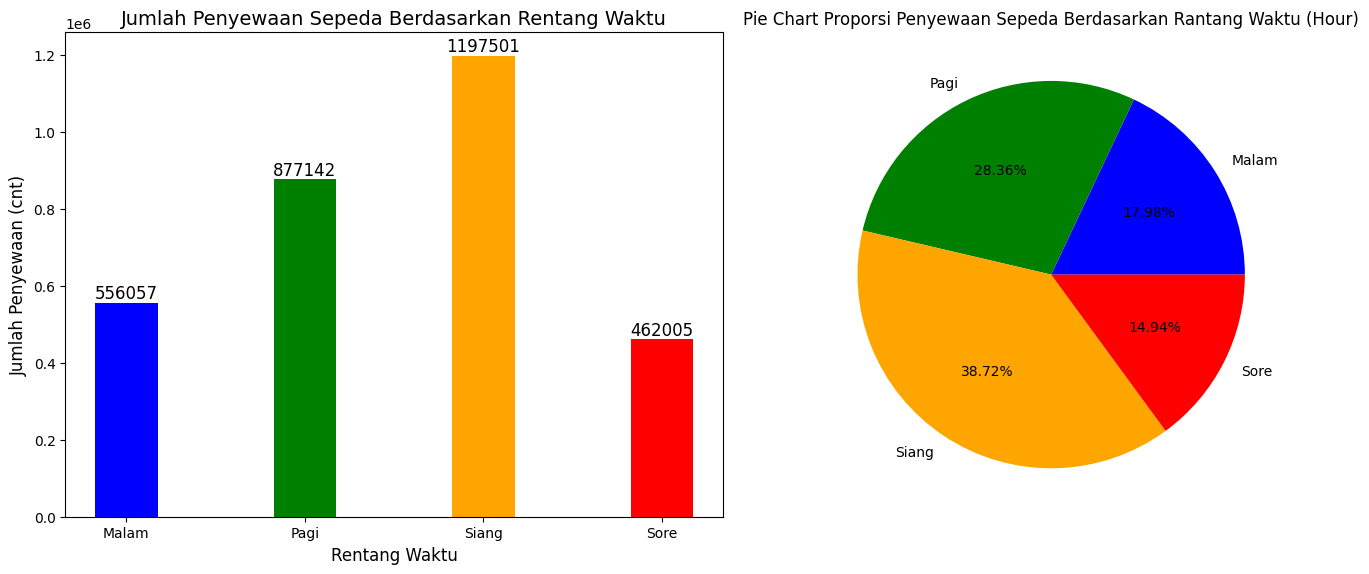

In [51]:
# Visualisasi dengan grafik batang
plt.figure(figsize=(10,6))

# Mengelompokkan data berdasarkan rentang waktu dan menghitung jumlah 'cnt'
dataEachTime = dataQuestion2.groupby('rentang_waktu')['cnt'].sum().reset_index()

# Menentukan posisi sumbu x untuk kategori rentang waktu
x = np.arange(len(dataEachTime))  # Lokasi rentang_waktu pada sumbu x
width = 0.35  # Lebar batang

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Membuat grafik batang untuk setiap rentang waktu
bars = ax[0].bar(x, dataEachTime['cnt'], width, label='Penyewaan Sepeda', color=['blue', 'green', 'orange', 'red'])

# Menambahkan label, judul, dan legenda
ax[0].set_title("Jumlah Penyewaan Sepeda Berdasarkan Rentang Waktu", fontsize=14)
ax[0].set_xlabel("Rentang Waktu", fontsize=12)
ax[0].set_ylabel("Jumlah Penyewaan (cnt)", fontsize=12)
ax[0].set_xticks(x, dataEachTime['rentang_waktu'])  # Mengatur label sumbu x sesuai rentang waktu

# Menampilkan jumlah di atas setiap batang
for bar in bars:
    yval = bar.get_height()  # Mendapatkan tinggi batang (nilai cnt)
    ax[0].text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Posisi teks
             f'{int(yval)}', ha='center', va='bottom', fontsize=12)

# Menampilkan pie chart dengan proporsi
ax[1].pie(dataEachTime['cnt'], labels=dataEachTime['rentang_waktu'], autopct='%1.2f%%', colors=['blue', 'green', 'orange', 'red'])
ax[1].set_title("Pie Chart Proporsi Penyewaan Sepeda Berdasarkan Rantang Waktu (Hour)")

plt.tight_layout()
plt.show()

Berdasarkan perbandingan dan proporsi pada chart di atas menunjukkan bahwa rentang waktu sangat mempengaruhi jumlah penyewaan sepeda pada tahun 2011, 2012.

Jumlah penyewaan sepeda tertinggi terjadi pada Malam hari, dengan jumlah penyewaan mencapai 556,057 atau sekitar 17.98% dari total penyewaan.

Jumlah penyewaan sepeda tertinggi terjadi pada Pagi hari, dengan jumlah penyewaan mencapai 877,142 atau sekitar 28.36% dari total penyewaan.

Jumlah penyewaan sepeda tertinggi terjadi pada Siang hari, dengan jumlah penyewaan mencapai 1,197,501 atau sekitar 38.72% dari total penyewaan.

Jumlah penyewaan sepeda tertinggi terjadi pada Sore hari, dengan jumlah penyewaan mencapai 462,005 atau sekitar 14.94% dari total penyewaan.

Kesimpulannya, waktu siang adalah waktu paling populer untuk penyewaan sepeda, sedangkan sore hari adalah waktu dengan jumlah penyewaan paling sedikit.

,weather_category,cnt,proportion
0,Berawan/Berkabut,764524,0.247202
1,Cerah/Sedikit berawan,2175325,0.703373
2,Cuaca Ekstrim,223,0.000072
3,Hujan Salju/Badai,152633,0.049353


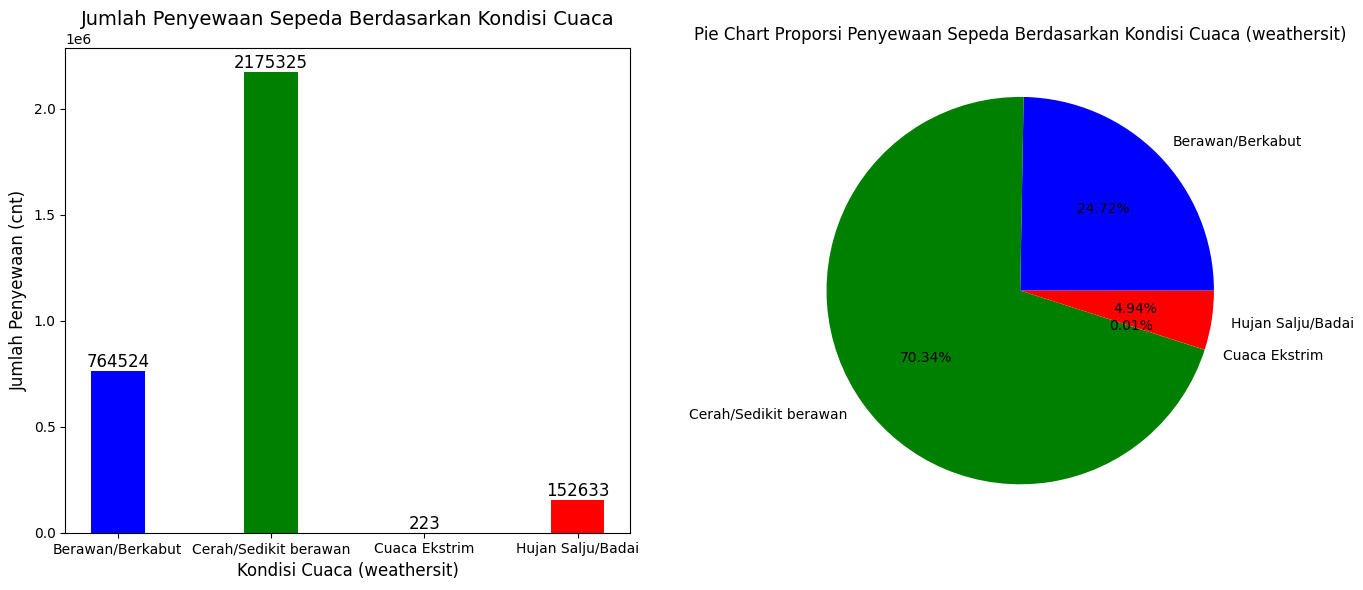

In [52]:

dataEachWeather = dataQuestion2.groupby('weather_category')['cnt'].sum().reset_index()

# Menghitung total penyewaan sepeda untuk seluruh kategori cuaca
total_rentals = dataEachWeather['cnt'].sum()

# Menghitung proporsi untuk setiap kategori cuaca
dataEachWeather['proportion'] = dataEachWeather['cnt'] / total_rentals

display(dataEachWeather)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Menentukan posisi sumbu x untuk kategori rentang waktu
x = np.arange(len(dataEachWeather))  # Lokasi weather_category pada sumbu x
width = 0.35  # Lebar batang

# Membuat grafik batang untuk setiap rentang waktu
bars = ax[0].bar(x, dataEachWeather['cnt'], width, label='Penyewaan Sepeda', color=['blue', 'green', 'orange', 'red'])

# Menambahkan label, judul, dan legenda
ax[0].set_title("Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca", fontsize=14)
ax[0].set_xlabel("Kondisi Cuaca (weathersit)", fontsize=12)
ax[0].set_ylabel("Jumlah Penyewaan (cnt)", fontsize=12)
ax[0].set_xticks(x, dataEachWeather['weather_category'])  # Mengatur label sumbu x sesuai rentang waktu

# Menampilkan jumlah di atas setiap batang
for bar in bars:
    yval = bar.get_height()  # Mendapatkan tinggi batang (nilai cnt)
    ax[0].text(bar.get_x() + bar.get_width() / 2, yval + 0.5,  # Posisi teks
             f'{int(yval)}', ha='center', va='bottom', fontsize=12)

# Menampilkan pie chart dengan proporsi
ax[1].pie(dataEachWeather['proportion'], labels=dataEachWeather['weather_category'], autopct='%1.2f%%', colors=['blue', 'green', 'orange', 'red'])
ax[1].set_title("Pie Chart Proporsi Penyewaan Sepeda Berdasarkan Kondisi Cuaca (weathersit)")

plt.tight_layout()
plt.show()

Berdasarkan data pada tahun 2011, 2012, berikut adalah hasil analisis pengaruh kondisi cuaca terhadap penyewaan sepeda:

**Berawan/Berkabut** memiliki jumlah penyewaan sepeda sebanyak 764,524 kali penyewaan, dengan persentase sebesar 24.72%.<br>

**Cerah/Sedikit berawan** memiliki jumlah penyewaan sepeda sebanyak 2,175,325 kali penyewaan, dengan persentase sebesar 70.34%.<br>

**Cuaca Ekstrim** memiliki jumlah penyewaan sepeda sebanyak 223 kali penyewaan, dengan persentase sebesar 0.01%.<br>

**Hujan Salju/Badai** memiliki jumlah penyewaan sepeda sebanyak 152,633 kali penyewaan, dengan persentase sebesar 4.94%.<br>

**Kesimpulan:**
Jumlah penyewaan sepeda sangat dipengaruhi oleh kondisi cuaca. Pengguna lebih memilih menyewa sepeda saat cuaca cerah atau sedikit berawan, sementara cuaca ekstrem dan hujan menyebabkan penurunan signifikan dalam jumlah penyewaan.

###Pertanyaan 3:

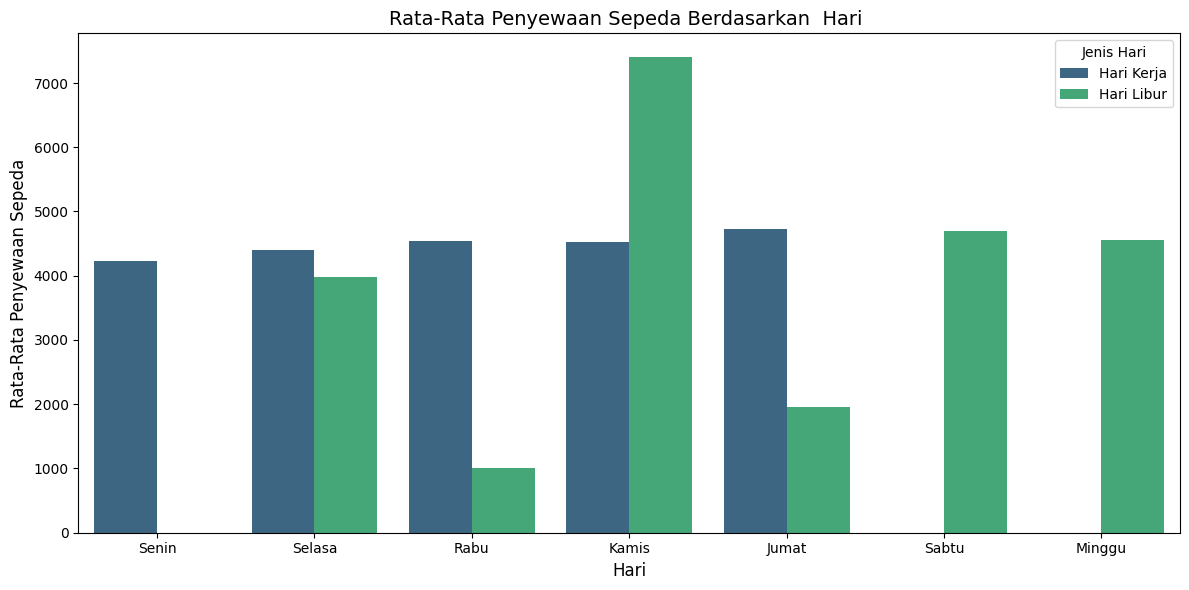

In [53]:
data_frame_ratio = read_perday
data_frame_ratio['holiday'] = data_frame_ratio.apply(
    lambda row: 1 if row['weekday'] in [5, 6] else row['holiday'],
    axis=1
)

# Mapping nama hari dan jenis hari
data_frame_ratio['weekday_name'] = data_frame_ratio['weekday'].map(day_mapping)
data_frame_ratio['holiday_type'] = data_frame_ratio['holiday'].map({0: 'Hari Kerja', 1: 'Hari Libur'})

# Menghitung rata-rata penyewaan sepeda per hari berdasarkan jenis hari
avg_bike_rentals = data_frame_ratio.groupby(['weekday_name', 'holiday_type'])['cnt'].mean().reset_index()

# Urutan hari dalam seminggu
order = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']

# Mengurutkan data sesuai urutan hari
avg_bike_rentals['weekday_name'] = pd.Categorical(
    avg_bike_rentals['weekday_name'], categories=order, ordered=True
)
avg_bike_rentals = avg_bike_rentals.sort_values('weekday_name')

# Visualisasi dengan bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    x='weekday_name',
    y='cnt',
    hue='holiday_type',
    data=avg_bike_rentals,
    palette='viridis'
)

# Menambahkan judul dan label
plt.title("Rata-Rata Penyewaan Sepeda Berdasarkan  Hari ", fontsize=14)
plt.xlabel("Hari", fontsize=12)
plt.ylabel("Rata-Rata Penyewaan Sepeda", fontsize=12)
plt.legend(title="Jenis Hari", loc='upper right')

# Menampilkan plot
plt.tight_layout()
plt.show()


###Pertanyaan 4:

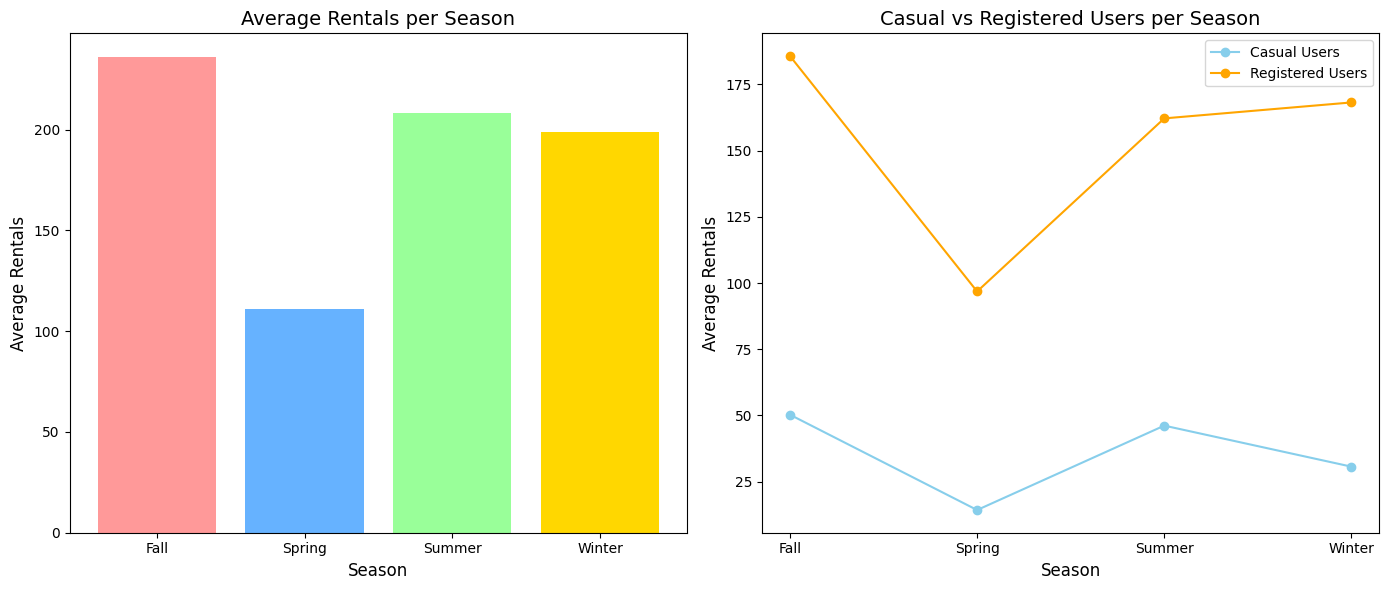

In [54]:
# Mapping musim untuk interpretasi
season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
read_perhour['season_name'] = read_perhour['season'].map(season_mapping)

# 1. Rata-rata jumlah peminjaman per musim
season_avg_rentals = read_perhour.groupby('season_name')['cnt'].mean()

# 2. Rata-rata peminjaman kasual dan terdaftar per musim
season_casual_registered = read_perhour.groupby('season_name')[['casual', 'registered']].mean()

# 3. Visualisasi data
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Grafik batang: rata-rata jumlah peminjaman per musim
ax[0].bar(season_avg_rentals.index, season_avg_rentals.values, color=['#FF9999', '#66B2FF', '#99FF99', '#FFD700'])
ax[0].set_title('Average Rentals per Season', fontsize=14)
ax[0].set_ylabel('Average Rentals', fontsize=12)
ax[0].set_xlabel('Season', fontsize=12)

# Grafik garis: perbandingan kasual vs terdaftar per musim
x_ticks = np.arange(len(season_casual_registered.index))
ax[1].plot(x_ticks, season_casual_registered['casual'], label='Casual Users', marker='o', color='skyblue')
ax[1].plot(x_ticks, season_casual_registered['registered'], label='Registered Users', marker='o', color='orange')
ax[1].set_title('Casual vs Registered Users per Season', fontsize=14)
ax[1].set_ylabel('Average Rentals', fontsize=12)
ax[1].set_xlabel('Season', fontsize=12)
ax[1].set_xticks(x_ticks)
ax[1].set_xticklabels(season_casual_registered.index)
ax[1].legend()

plt.tight_layout()
plt.show()


## Conclusion

- Conclution pertanyaan 1
-Statistik deskriptif menunjukkan bahwa kolom windspeed memiliki nilai rata-rata tertentu dengan variasi data yang signifikan. Hal ini menunjukkan bahwa kecepatan angin bervariasi dari sangat rendah hingga tinggi dalam dataset.
1. Kecepatan angin (windspeed) memiliki hubungan negatif lemah dengan jumlah peminjaman sepeda. Angin kencang memang mengurangi jumlah peminjaman, tetapi tidak secara signifikan.
2. Pada kecepatan angin rendah, jumlah peminjaman lebih tinggi, sedangkan angin yang lebih kuat mengurangi aktivitas peminjaman.
3. Meskipun windspeed memiliki dampak kecil, faktor lain seperti suhu (temp), kelembapan (hum), dan kondisi cuaca (weathersit) juga berperan dalam memengaruhi jumlah peminjaman sepeda.


- Conclution pertanyaan 2
- Dari statistik diatas menunjukkan bahwa waktu dan cuaca sangat mempengaruhi terhadap jumlah penyewaan sepeda, contohnya adalah waktu dengan total penyewaan sepeda terbanyak berada di siang hari dan terendah berada di sore hari. Sedangkan untuk cuaca yang memiliki dampak positif terhadap penyewaan sepeda adalah ketika cuacanya **Cerah/Sedikit Berawan** dimana total user/penyewanya sebesar 70.34% dan cuaca yang memiliki dampak negatif (penurunan signifikan) berada pada kondisi cuaca ekstrim.

- Conclution pertanyaan 3
- Statistik penyewaan sepeda secara keseluruhan menunjukkan perbedaan yang jelas antara hari libur (termasuk akhir pekan) dan hari kerja. Akhir pekan/liburan memiliki rata-rata penyewaan yang lebih tinggi, yang mengindikasikan peningkatan penggunaan untuk bersantai, sementara hari kerja menunjukkan rata-rata penyewaan yang lebih rendah, yang mungkin mencerminkan lebih banyak penggunaan yang bersifat fungsional atau yang berhubungan dengan perjalanan. Wawasan ini sangat berharga bagi bisnis penyewaan sepeda untuk memahami perilaku pelanggan, menyesuaikan strategi penetapan harga, dan merencanakan kampanye promosi untuk menargetkan segmen pengguna yang berbeda secara efektif sepanjang minggu.


- Conclution pertanyaan 4
-**Grafik Batang**: Rata-rata Jumlah Peminjaman per Musim
Penjelasan: Grafik ini menunjukkan rata-rata peminjaman sepeda untuk setiap musim: Musim Gugur (Fall) memiliki jumlah peminjaman tertinggi. Musim Semi (Spring) memiliki jumlah peminjaman terendah. Jawaban: Musim gugur adalah musim dengan potensi terbesar untuk promosi layanan sepeda karena penggunaannya paling tinggi. Kampanye promosi dapat diperkuat di musim ini untuk memaksimalkan keuntungan.

**Grafik Garis**: Perbandingan Pengguna Kasual vs Terdaftar per Musim
Penjelasan: Grafik ini membandingkan rata-rata peminjaman oleh pengguna kasual dan terdaftar: Pengguna terdaftar mendominasi di semua musim. Pengguna kasual meningkat signifikan di musim panas dan musim gugur, menunjukkan peluang untuk promosi musiman yang lebih santai. Jawaban: Promosi dapat difokuskan pada pengguna kasual selama musim panas dan gugur karena segmen ini lebih responsif terhadap kondisi cuaca yang mendukung.